Class
0    275190
1       473
Name: count, dtype: int64
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -

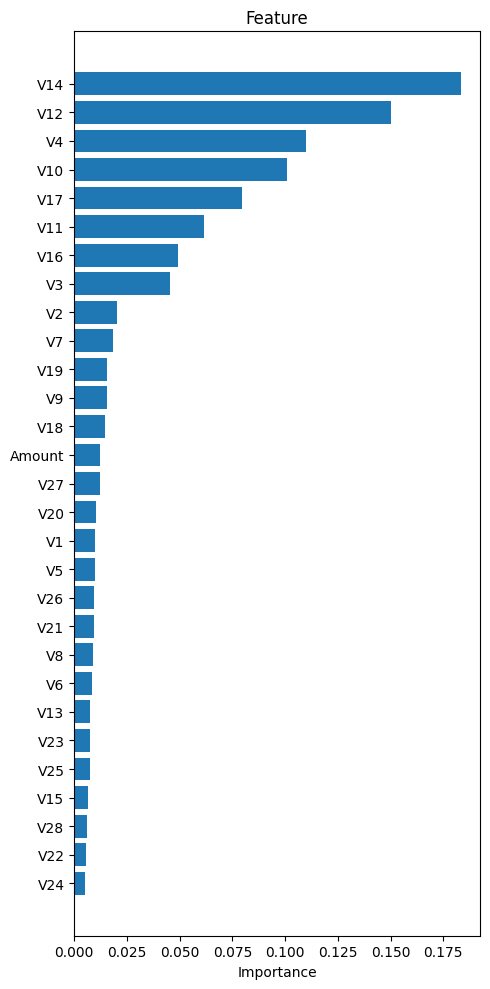

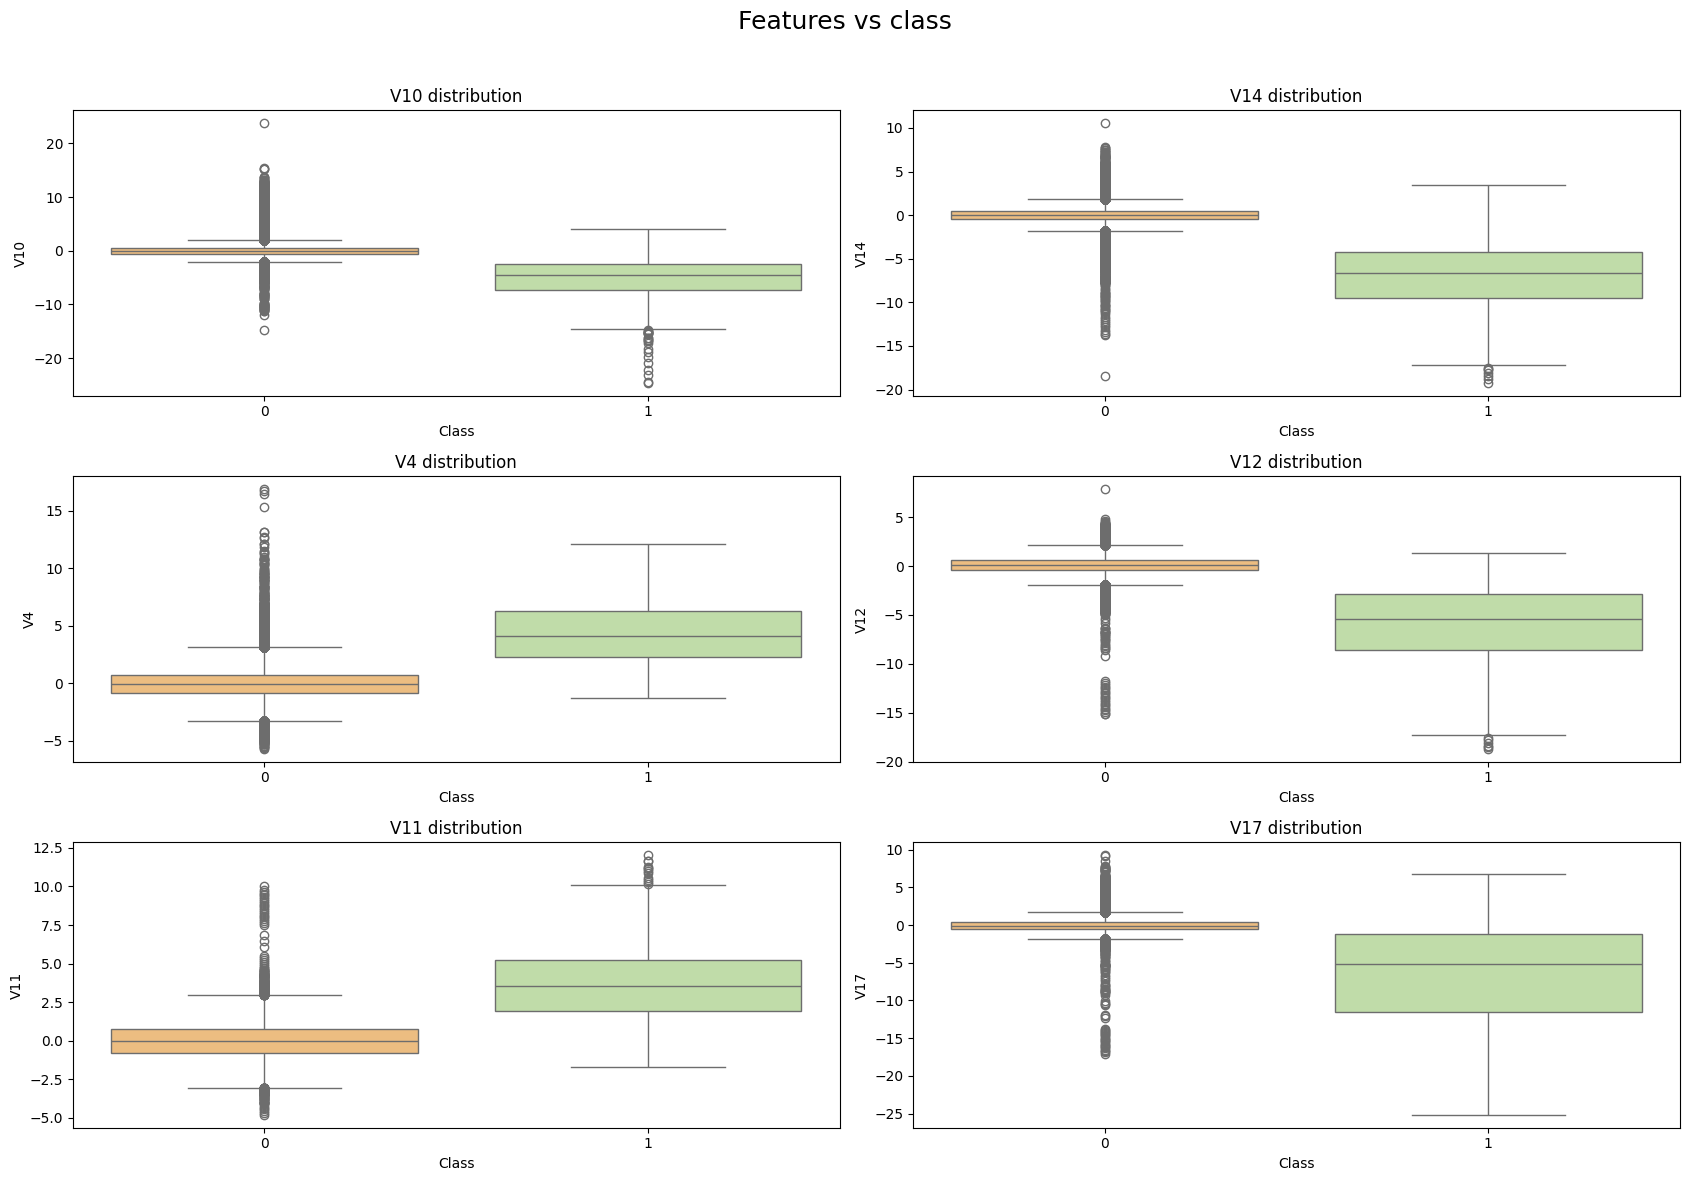

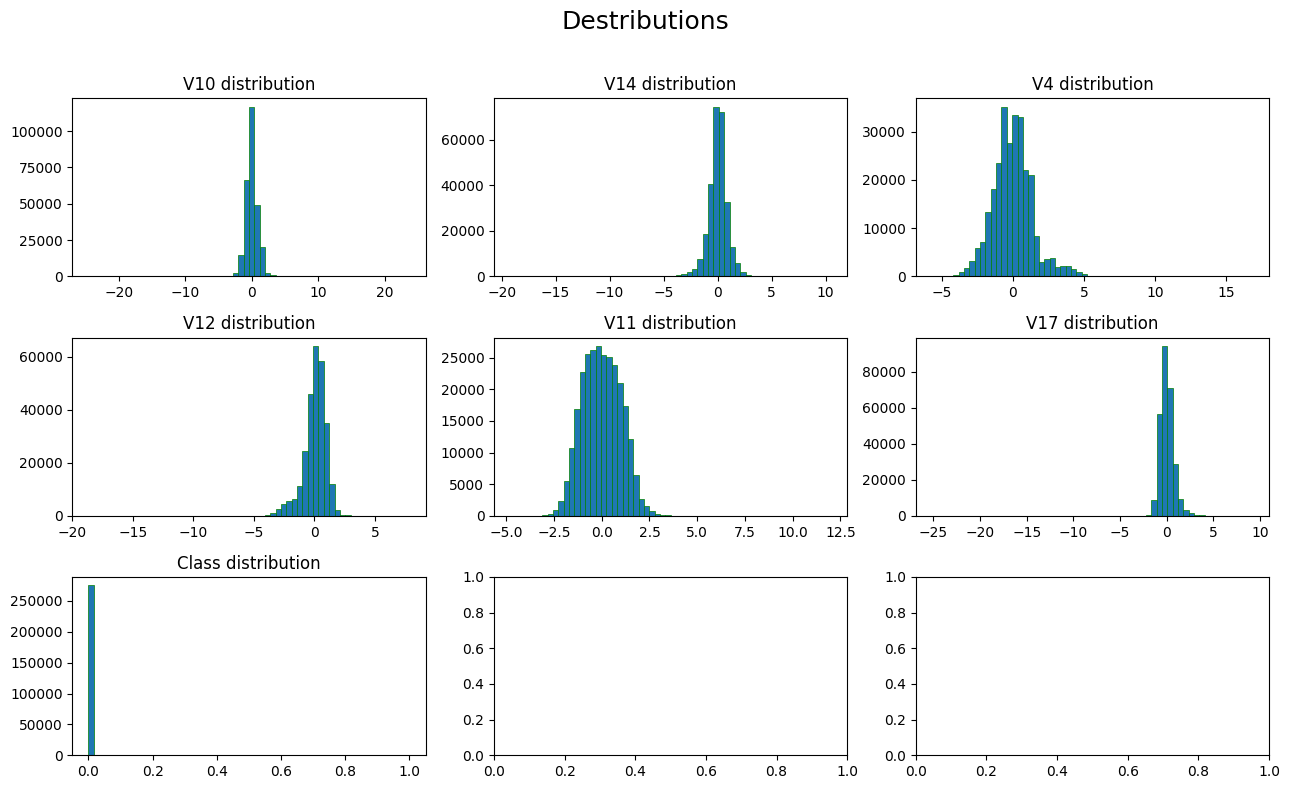

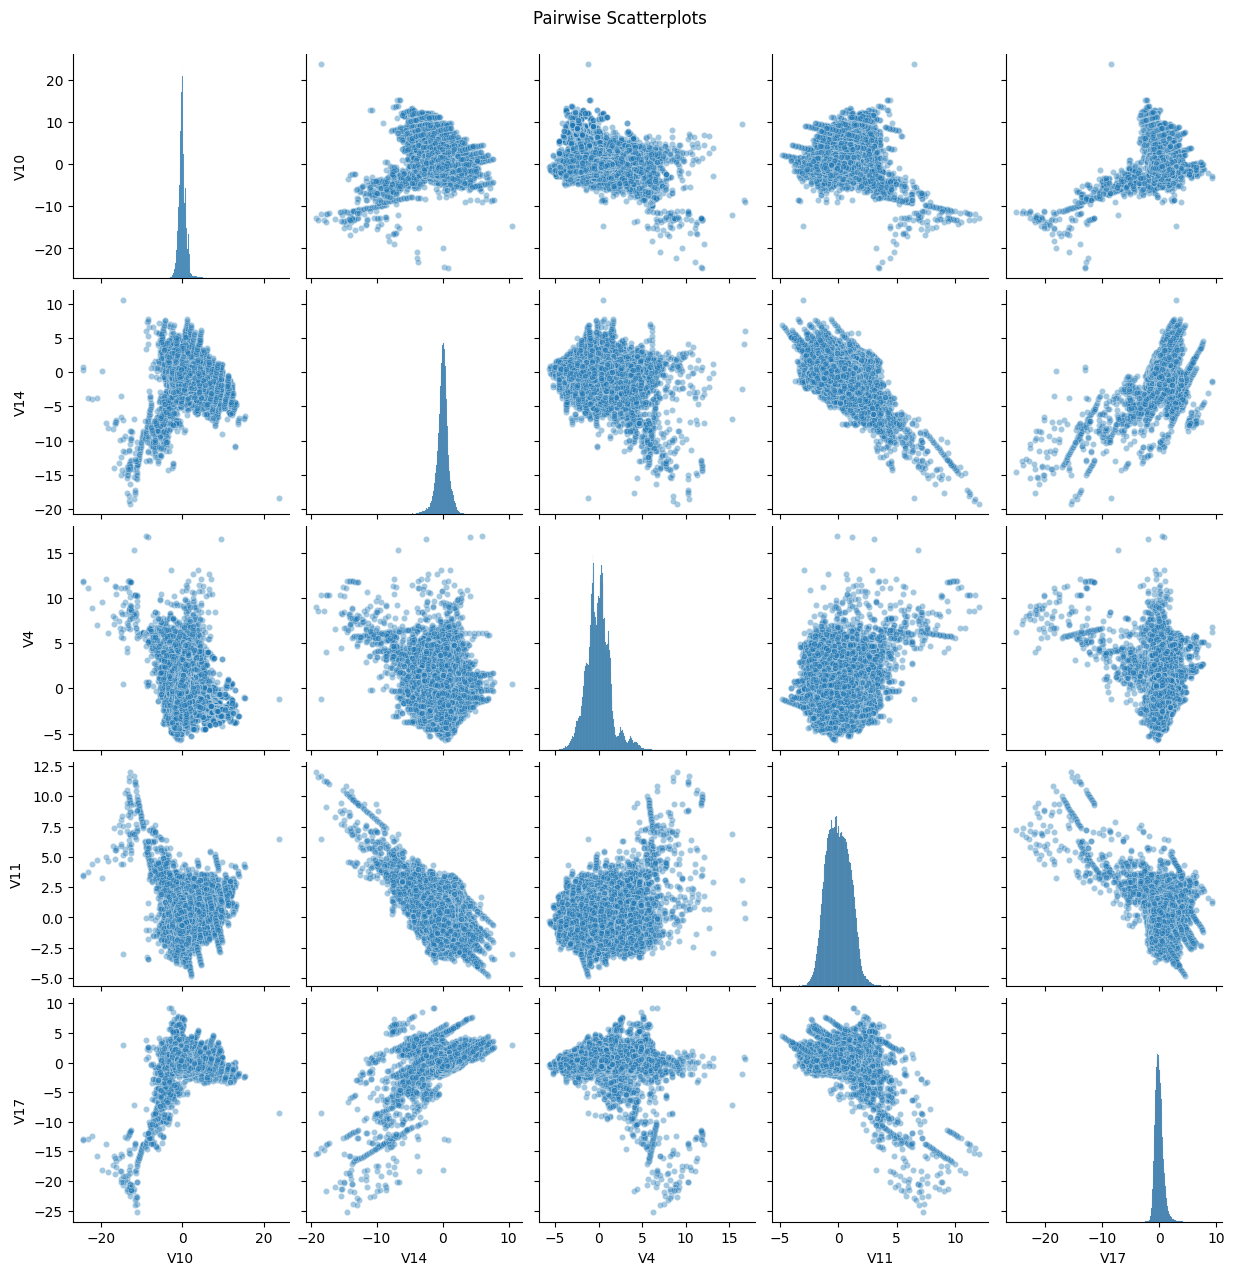

Знайдено 697 рядків з >2 викидами
Індекси викидів: [541, 1632, 4895, 5425, 5909, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6462, 6472, 6529, 6595, 6609, 6641, 6717, 6719, 6730, 6734, 6774, 6812, 6820, 6870, 6882, 6899, 6903, 7057, 7103, 7389, 8296, 8312, 8335, 8464, 8615, 8617, 8625, 8842, 8845, 9035, 9179, 9252, 9487, 9509, 10456, 10568, 10573, 10620, 10630, 10681, 10690, 10783, 10801, 10891, 10897, 10906, 11343, 11710, 11841, 11880, 12030, 12070, 12108, 12156, 12229, 12261, 12325, 12369, 12468, 12922, 12938, 13394, 13405, 13499, 13617, 13624, 13725, 13796, 13833, 13885, 13942, 14026, 14115, 14144, 14170, 14197, 14211, 14223, 14590, 14822, 14900, 14920, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16110, 16777, 16780, 16851, 16863, 16958, 17317, 17322, 17366, 17407, 17453, 17480, 17592, 17852, 17916, 18125, 18150, 18472, 18649, 18773, 18809, 19145, 19183, 20260, 20344, 21266, 21556, 22265, 22836, 22879, 22945, 23308, 24163, 26802, 27627, 27

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

class Tsk:
    def __init__(self):
        self.features = None
        self.df = pd.read_csv('creditcard.csv')

    def data(self):
        self.df = self.df.drop(['Time'], axis=1)
        self.df = self.df.drop_duplicates()
        print(self.df['Class'].value_counts())
        print(self.df.head(10))
        self.df.info()
        print(self.df.describe())
        print("Назви колонок:", self.df.columns.tolist())

    def ft_imp(self):
        X = self.df.drop(['Class'], axis=1)
        y = self.df['Class']

        self.X_tain, self.X_test, self.y_tarin, self.y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=33)

        clf = RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=33, class_weight='balanced')
        clf.fit(self.X_tain, self.y_tarin)

        imptances = clf.feature_importances_
        self.feat_imp = pd.DataFrame({'feature': X.columns, 'importance': imptances})
        self.feat_imp = self.feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)
        self.features = ['V10', 'V14', 'V4', 'V12', 'V11', 'V17', 'Class']
        self.df = self.df[self.features].copy(deep=True)
        self.df.info


    def cls_vs_feat(self):
        fig, axes = plt.subplots(3, 2, figsize=(17, 12))
        fig.suptitle('Features vs class', size = 18)

        for ax, feat in zip(axes.flatten(), self.features):
            sns.boxplot(
                ax=ax,
                data=self.df,
                x='Class',
                y=feat,
                hue='Class',
                palette='Spectral',
                dodge=False
            )
            ax.set_title(f"{feat} distribution")
            ax.get_legend().remove()
        plt.tight_layout(rect=[0, 0, 1, 0.96])

        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
        fig.suptitle('Destributions\n', size=18)
        for ax, feat in zip(axes.flatten(), self.features):
            ax.hist(self.df[feat], bins=60, linewidth=0.5, edgecolor='green')
            ax.set_title(f"{feat} distribution")
        plt.tight_layout()

    def visual_ft_imp(self):
        print(self.feat_imp)
        plt.figure(figsize=(5,10))
        plt.barh(self.feat_imp['feature'], self.feat_imp['importance'])
        plt.gca().invert_yaxis()
        plt.xlabel('Importance')
        plt.title('Feature')
        plt.tight_layout()
        plt.show()

    def distributions(self):
        self.features = ['V10', 'V14', 'V4', 'V11', 'V17']
        sns.pairplot(self.df[self.features], diag_kind='hist', plot_kws={'alpha':0.4, 's':20})
        plt.suptitle('Pairwise Scatterplots', y=1.02)
        plt.show()

    def IQR_method(self, n=2, k=1.5, visualize=False):
        from collections import Counter
        features = self.features[:-1]
        df = self.df.copy()
        outlier_list = []

        for column in features:
            Q1 = np.percentile(df[column], 25)
            Q3 = np.percentile(df[column], 75)
            IQR = Q3 - Q1
            outlier_step = k * IQR

            outlier_indices = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
            outlier_list.extend(outlier_indices)

        outlier_counter = Counter(outlier_list)
        multiple_outliers = [idx for idx, count in outlier_counter.items() if count > n]

        print(f"Знайдено {len(multiple_outliers)} рядків з >{n} викидами")

        if visualize:
            df_out = df[features].copy()
            df_out['anomaly'] = 'normal'
            df_out.loc[multiple_outliers, 'anomaly'] = 'outlier'

            sns.pairplot(
                df_out,
                vars=features,
                hue='anomaly',
                palette={'normal': 'blue', 'outlier': 'red'},
                diag_kind='hist',
                plot_kws={'alpha': 0.4, 's': 20}
            )
            plt.suptitle('Pairwise Scatterplots with IQR Outliers Highlighted', y=1.02)
            plt.show()

            for group, title in [('normal', 'Normal Observations'), ('outlier', 'IQR Outliers')]:
                group_df = df_out[df_out['anomaly'] == group]
                fig, axes = plt.subplots(3, 2, figsize=(12, 8))
                fig.suptitle(f'Feature Distributions: {title}', size=16)

                for ax, feat in zip(axes.flatten(), features):
                    ax.hist(group_df[feat], bins=60, alpha=0.7, edgecolor='white')
                    ax.set_title(f"{feat} ({group})")
                    ax.set_xlabel(feat)
                    ax.set_ylabel("Count")

                plt.tight_layout(rect=[0, 0, 1, 0.95])
                plt.show()

            # Оцінка точності
            df_out['pred_iqr'] = 0
            df_out.loc[multiple_outliers, 'pred_iqr'] = 1

            y_true = df['Class']
            y_pred = df_out['pred_iqr']

            from sklearn.metrics import classification_report, confusion_matrix
            print("=== IQR Outlier Detection vs. True Fraud Labels ===")
            print("\nClassification Report:")
            print(classification_report(y_true, y_pred, target_names=['non‑fraud', 'fraud']))

            cm = confusion_matrix(y_true, y_pred)
            cm_df_out = pd.DataFrame(cm,
                                     index=['true_non‑fraud', 'true_fraud'],
                                     columns=['pred_non‑fraud', 'pred_fraud'])
            print("\nConfusion Matrix:")
            print(cm_df_out)

        return multiple_outliers


start_tsk = Tsk()
start_tsk.data()
start_tsk.ft_imp()
start_tsk.visual_ft_imp()
start_tsk.cls_vs_feat()
start_tsk.distributions()
outlier_ids = start_tsk.IQR_method()
print(f"Індекси викидів: {outlier_ids}")
print(f"Знайдено {len(outlier_ids)} рядків з >2 викидами")